#### CHALLENGES
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources have been using analytics for years, however, the collection, processing, and analysis of data has been largely manual. Given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments wokeup to the utility of machine learning so late in the game. Data analysts can derive insights from the data, and predictive analytics can be done by data scientists and engineers

#### PROJECT DESCRIPTION: HR ANALYTICS CLASSIFICATION
Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problemsyour client is facing is identifying the right people for promotion (only for manager positions and below) and preparing them in time. The process they currently
follow is to:
First, identify a set of employees based on recommendations/ past performance, then selected employees go through the separate training and evaluation program for each vertical, and these programs are based on the required skill of each vertical.
At the end of the program, based on various factors such as training performance, KPI completion, the employee gets a promotion. But only employees with KPIs completed greater than 60% are usually considered.
For the aforementioned process, the final promotions are only announced after the evaluation, and this leads to delay in the transition to their new roles. Hence, the company needs assistance in identifying the eligible candidates at a particular checkpoint, so that they can expedite the entire promotion cycle.
They have provided multiple attributes around the employee's past and current performance along with demographics. Now, the task is to predict whether a potential “promotee” at the checkpoint in the test set will be promoted or not, after the evaluation process.

# Import All Libraries

In [1]:
#import all libraries and classes
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.under_sampling import NeighbourhoodCleaningRule
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
matplotlib.style.use("ggplot")
sns.set()

C:\Users\Williams\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import And Inspect The Dataset

In [2]:
#import the dataset
trainset= pd.read_csv(r"train_LZdllcl.csv")
testset = pd.read_csv(r"test_2umaH9m.csv")

# Exploratory Data Analysis (EDA)

## Data Info

In [3]:
#inspect the first five records
trainset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0


In [4]:
#inspect the dimension of the dataset
trainset.shape

(54808, 14)

In [5]:
#inspect the data types of each column of the dataset
trainset.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
#inspect some quick statistics of the dataset
trainset.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.00,54808.00,54808.00,50684.00,54808.00,54808.00,54808.00,54808.00,54808.00
mean,39195.83,1.25,34.80,3.33,5.87,0.35,0.02,63.39,0.09
std,22586.58,0.61,7.66,1.26,4.27,0.48,0.15,13.37,0.28
min,1.00,1.00,20.00,1.00,1.00,0.00,0.00,39.00,0.00
25%,19669.75,1.00,29.00,3.00,3.00,0.00,0.00,51.00,0.00
50%,39225.50,1.00,33.00,3.00,5.00,0.00,0.00,60.00,0.00
75%,58730.50,1.00,39.00,4.00,7.00,1.00,0.00,76.00,0.00
max,78298.00,10.00,60.00,5.00,37.00,1.00,1.00,99.00,1.00


## Data Preparation And Wrangling

## Wrangling the trainset

In [7]:
#copy the dataset to another variable just to keep the original dataset
trainset_copy = trainset.copy()

In [8]:
#rename the KPI column
trainset_copy.rename(columns={"KPIs_met >80%": "KPIs_met >60%"}, inplace=True)

In [9]:
#check for null columns
trainset_copy.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >60%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
#check the data types of the null columns
print(trainset_copy["education"].dtypes)
print(trainset_copy["previous_year_rating"].dtypes)

object
float64


### Cleaning the "education" column

In [11]:
#check the frequency of each education qualification
trainset_copy["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [12]:
#inspect the first 5 observations containing null values in the "education" column
trainset_copy[trainset_copy["education"].isnull()].head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,nan,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.00,11,0,0,57,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.00,2,0,0,48,0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.00,2,0,0,48,0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.00,2,0,0,53,0


In [13]:
#check the frequency of each category of the "department" column
trainset_copy["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [14]:
#inspect the sum of null values in education
trainset_copy["education"].isnull().sum()

2409

In [15]:
#check the frequency of the class of Education for all Sales & Marketing personnel
trainset_copy.groupby("department").get_group("Sales & Marketing")["education"].value_counts()

Bachelor's          11099
Master's & above     4166
Name: education, dtype: int64

In [16]:
#check the number of values of "education" qualification that is in the "Sales & Marketing" department
trainset_copy.groupby("department").get_group("Sales & Marketing")["education"].isnull().sum()

1575

In [17]:
#calculate and store the proportion of each "education" qualification that is in the "Sales & Marketing" department
b = int(11099/(11099+4166)*1575)
m = 1575 - b

In [18]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Sales & Marketing")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [19]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Sales & Marketing")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [20]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Sales & Marketing")["education"].isnull().sum()

0

In [21]:
#check the frequency of the class of Education for all Operations personneltrainset_copy
trainset_copy.groupby("department").get_group("Operations")["education"].value_counts()

Bachelor's          7781
Master's & above    3165
Below Secondary      176
Name: education, dtype: int64

In [22]:
#check the number of values of "education" qualification that is in the "Operations" department
trainset_copy.groupby("department").get_group("Operations")["education"].isnull().sum()

226

In [23]:
#calculate and store the proportion of each "education" qualification that is in the "Operations" department
b = int(7781/(7781+3165+176)*226)
m = int(3165/(7781+3165+176)*226)
s = 226 - b - m

In [24]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [25]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [26]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [27]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Operations")["education"].isnull().sum()

0

In [28]:
#check the frequency of the class of Education for all Procurement personnel
trainset_copy.groupby("department").get_group("Procurement")["education"].value_counts()

Bachelor's          4393
Master's & above    2544
Below Secondary      129
Name: education, dtype: int64

In [29]:
#check the number of values of "education" qualification that is in the "Procurement" department
trainset_copy.groupby("department").get_group("Procurement")["education"].isnull().sum()

72

In [30]:
#calculate and store the proportion of each "education" qualification that is in the "Procurement" department
b = int(4393/(4393+2544+129)*72)
m = int(2544/(4393+2544+129)*72)
s = 72 - b - m

In [31]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [32]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [33]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [34]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Procurement")["education"].isnull().sum()

0

In [35]:
#check the frequency of the class of Education for all Technology personnel
trainset_copy.groupby("department").get_group("Technology")["education"].value_counts()

Bachelor's          4642
Master's & above    2196
Below Secondary      201
Name: education, dtype: int64

In [36]:
#check the number of values of "education" qualification that is in the "Technology" department
trainset_copy.groupby("department").get_group("Technology")["education"].isnull().sum()

99

In [37]:
#calculate and store the proportion of each "education" qualification that is in the "Technology" department
b = int(4642/(4642+2196+201)*99)
m = int(2196/(4642+2196+201)*99)
s = 99 - b - m

In [38]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [39]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [40]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [41]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Technology")["education"].isnull().sum()

0

In [42]:
#check the frequency of the class of Education for all Analytics personnel
trainset_copy.groupby("department").get_group("Analytics")["education"].value_counts()

Bachelor's          3978
Master's & above    1037
Name: education, dtype: int64

In [43]:
#check the number of values of "education" qualification that is in the "Analytics" department
trainset_copy.groupby("department").get_group("Analytics")["education"].isnull().sum()

337

In [44]:
#calculate and store the proportion of each "education" qualification that is in the "Analytics" department
b = int(3978/(3978+1037)*337)
m = 337 - b

In [45]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Analytics")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [46]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Analytics")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [47]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Analytics")["education"].isnull().sum()

0

In [48]:
#check the frequency of the class of Education for all Finance personnel
trainset_copy.groupby("department").get_group("Finance")["education"].value_counts()

Bachelor's          1895
Master's & above     499
Below Secondary      106
Name: education, dtype: int64

In [49]:
#check the number of values of "education" qualification that is in the "Finance" department
trainset_copy.groupby("department").get_group("Finance")["education"].isnull().sum()

36

In [50]:
#calculate and store the proportion of each "education" qualification that is in the "Finance" department
b = int(1895/(1895+499+106)*36)
m = int(499/(1895+499+106)*36)
s = 36 - b - m

In [51]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [52]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [53]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [54]:
#confirm that it has been filledtrainset_copy
trainset_copy.groupby("department").get_group("Finance")["education"].isnull().sum()

0

In [55]:
#check the frequency of the class of Education for all HR personnel
trainset_copy.groupby("department").get_group("HR")["education"].value_counts()

Bachelor's          1525
Master's & above     733
Below Secondary      128
Name: education, dtype: int64

In [56]:
#check the number of values of "education" qualification that is in the "HR" department
trainset_copy.groupby("department").get_group("HR")["education"].isnull().sum()

32

In [57]:
#calculate and store the proportion of each "education" qualification that is in the "HR" department
b = int(1525/(1525+733+128)*32)
m = int(733/(1525+733+128)*32)
s = 32 - b - m

In [58]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("HR")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [59]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("HR")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [60]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("HR")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [61]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("HR")["education"].isnull().sum()

0

In [62]:
#check the frequency of the class of Education for all Legal personnel
trainset_copy.groupby("department").get_group("Legal")["education"].value_counts()

Bachelor's          814
Master's & above    156
Below Secondary      65
Name: education, dtype: int64

In [63]:
#check the number of values of "education" qualification that is in the "Legal" department
trainset_copy.groupby("department").get_group("Legal")["education"].isnull().sum()

4

In [64]:
#calculate and store the proportion of each "education" qualification that is in the "legal" department
b = 2
m = 1
s = 1

In [65]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("Legal")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [66]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("Legal")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [67]:
#fill a proportion of null fields with "Below Secondary"
S = trainset_copy.groupby("department").get_group("Legal")["education"].fillna(value="Below Secondary", limit=s)
trainset_copy["education"].update(S)

In [68]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("Legal")["education"].isnull().sum()

0

In [69]:
#check the frequency of the class of Education for all R&D personnel
trainset_copy.groupby("department").get_group("R&D")["education"].value_counts()

Bachelor's          542
Master's & above    429
Name: education, dtype: int64

In [70]:
#check the number of values of "education" qualification that is in the "R&D" department
trainset_copy.groupby("department").get_group("R&D")["education"].isnull().sum()

28

In [71]:
#calculate and store the proportion of each "education" qualification that is in the "R&D" department
b = int(542/(542+429)*28)
m = 28 - b

In [72]:
#fill a proportion of null fields with "Bachelor's"
B = trainset_copy.groupby("department").get_group("R&D")["education"].fillna(value="Bachelor's", limit=b)
trainset_copy["education"].update(B)

In [73]:
#fill a proportion of null fields with "Master's & above"
M = trainset_copy.groupby("department").get_group("R&D")["education"].fillna(value="Master's & above", limit=m)
trainset_copy["education"].update(M)

In [74]:
#confirm that it has been filled
trainset_copy.groupby("department").get_group("R&D")["education"].isnull().sum()

0

In [75]:
#inspect "education" column for missing values
trainset_copy["education"].isnull().sum()

0

### Cleaning the "previous_year_rating" column

In [76]:
#inspect the sum of null values in "previous_year_rating"
trainset_copy["previous_year_rating"].isnull().sum()

4124

In [77]:
#check the frequency of each education qualification
trainset_copy["previous_year_rating"].value_counts()

3.00    18618
5.00    11741
4.00     9877
1.00     6223
2.00     4225
Name: previous_year_rating, dtype: int64

In [78]:
#inspect the first 5 observations containing null values in the "education" column
trainset_copy[trainset_copy["previous_year_rating"].isnull()].head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,nan,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,nan,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,nan,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,nan,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,nan,1,1,0,47,0


In [79]:
#inspect the full dataset
trainset_copy.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0


In [80]:
#inspect the total number of null values in the "previous_year_rating" column
trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].isnull().sum()

4124

In [81]:
#inspect each available rating
trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].value_counts()

3.00    158
4.00    114
5.00     64
1.00     44
2.00     43
Name: previous_year_rating, dtype: int64

In [82]:
#calculate and store the proportion of each rating
one = int(44/(44+43+64+114+158)*4124)
two = int(43/(44+43+64+114+158)*4124)
three = int(64/(44+43+64+114+158)*4124)
four = int(114/(44+43+64+114+158)*4124)
five = 4124 - (one + two + three + four)

In [83]:
#fill a proportion of null fields with 1
ONE = trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=1, limit=one)
trainset_copy["previous_year_rating"].update(ONE)

In [84]:
#fill a proportion of null fields with 2
TWO = trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=2, limit=two)
trainset_copy["previous_year_rating"].update(TWO)

In [85]:
#fill a proportion of null fields with 3
THREE = trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=3, limit=three)
trainset_copy["previous_year_rating"].update(THREE)

In [86]:
#fill a proportion of null fields with 4
FOUR = trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=4, limit=four)
trainset_copy["previous_year_rating"].update(FOUR)

In [87]:
#fill a proportion of null fields with 5
FIVE =trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=5, limit=five)
trainset_copy["previous_year_rating"].update(FIVE)

In [88]:
#inspect the null values
trainset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].isnull().sum()

0

In [89]:
#confirm that the null values have been filled
trainset_copy["previous_year_rating"].isnull().sum()

0

In [90]:
#double check the whole dataset for any null valuestrainset_copy
trainset_copy.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >60%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Wrangling the testset

In [91]:
#copy the dataset to another variable just to keep the original dataset
testset_copy = testset.copy()

In [92]:
#rename the KPI column
testset_copy.rename(columns={"KPIs_met >80%": "KPIs_met >60%"}, inplace=True)

In [93]:
#check for null columns
testset_copy.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >60%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [94]:
#check the data types of the null columns
print(testset_copy["education"].dtypes)
print(testset_copy["previous_year_rating"].dtypes)

object
float64


### Cleaning the "education" column

In [95]:
#check the frequency of each education qualification
testset_copy["education"].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [96]:
#inspect the first 5 observations containing null values in the "education" column
testset_copy[testset_copy["education"].isnull()].head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score
49,3720,Sales & Marketing,region_2,NaN,m,sourcing,1,36,5.00,4,1,0,49
67,26977,Operations,region_2,NaN,m,sourcing,1,28,3.00,3,0,0,59
89,2347,Analytics,region_15,NaN,m,other,2,37,5.00,8,1,0,82
127,42719,Analytics,region_21,NaN,m,sourcing,1,27,nan,1,0,0,80
138,2721,Analytics,region_22,NaN,f,sourcing,2,26,5.00,3,1,0,86


In [97]:
#check the frequency of each category of the "department" column
testset_copy["department"].value_counts()

Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64

In [98]:
testset_copy["region"].value_counts()

region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_10     269
region_8      269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: region, dtype: int64

In [99]:
#inspect the sum of null values in education
testset_copy["education"].isnull().sum()

1034

In [100]:
#check the frequency of the class of Education for all Sales & Marketing personnel
testset_copy.groupby("department").get_group("Sales & Marketing")["education"].value_counts()

Bachelor's          4818
Master's & above    1834
Name: education, dtype: int64

In [101]:
#check the number of values of "education" qualification that is in the "Sales & Marketing" department
testset_copy.groupby("department").get_group("Sales & Marketing")["education"].isnull().sum()

663

In [102]:
#calculate and store the proportion of each "education" qualification that is in the "Sales & Marketing" department
b = int(4818/(4818+1834)*663)
m = 663 - b

In [103]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Sales & Marketing")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [104]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Sales & Marketing")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [105]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Sales & Marketing")["education"].isnull().sum()

0

In [106]:
#check the frequency of the class of Education for all Operations personnel
testset_copy.groupby("department").get_group("Operations")["education"].value_counts()

Bachelor's          3298
Master's & above    1301
Below Secondary       73
Name: education, dtype: int64

In [107]:
#check the number of values of "education" qualification that is in the "Operations" department
testset_copy.groupby("department").get_group("Operations")["education"].isnull().sum()

92

In [108]:
#calculate and store the proportion of each "education" qualification that is in the "Operations" department
b = int(3298/(3298+1301+73)*92)
m = int(1301/(3298+1301+73)*92)
s = 92 - b - m

In [109]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [110]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [111]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("Operations")["education"].fillna(value="Below Secondary", limit=s)
testset_copy["education"].update(S)

In [112]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Operations")["education"].isnull().sum()

0

In [113]:
#check the frequency of the class of Education for all Procurement personnel
testset_copy.groupby("department").get_group("Procurement")["education"].value_counts()

Bachelor's          1807
Master's & above    1101
Below Secondary       72
Name: education, dtype: int64

In [114]:
#check the number of values of "education" qualification that is in the "Procurement" department
testset_copy.groupby("department").get_group("Procurement")["education"].isnull().sum()

40

In [115]:
#calculate and store the proportion of each "education" qualification that is in the "Procurement" department
b = int(1807/(1807+1101+72)*40)
m = int(1101/(1807+1101+72)*40)
s = 40 - b - m

In [116]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [117]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [118]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("Procurement")["education"].fillna(value="Below Secondary", limit=s)
testset_copy["education"].update(S)

In [119]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Procurement")["education"].isnull().sum()

0

In [120]:
#check the frequency of the class of Education for all Technology personnel
testset_copy.groupby("department").get_group("Technology")["education"].value_counts()

Bachelor's          1916
Master's & above     966
Below Secondary       87
Name: education, dtype: int64

In [121]:
#check the number of values of "education" qualification that is in the "Technology" department
testset_copy.groupby("department").get_group("Technology")["education"].isnull().sum()

42

In [122]:
#calculate and store the proportion of each "education" qualification that is in the "Technology" department
b = int(1916/(1916+966+87)*42)
m = int(966/(1916+966+87)*42)
s = 42 - b - m

In [123]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [124]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [125]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("Technology")["education"].fillna(value="Below Secondary", limit=s)
testset_copy["education"].update(S)

In [126]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Technology")["education"].isnull().sum()

0

In [127]:
#check the frequency of the class of Education for all Analytics personnel
testset_copy.groupby("department").get_group("Analytics")["education"].value_counts()

Bachelor's          1703
Master's & above     461
Name: education, dtype: int64

In [128]:
#check the number of values of "education" qualification that is in the "Analytics" department
testset_copy.groupby("department").get_group("Analytics")["education"].isnull().sum()

155

In [129]:
#calculate and store the proportion of each "education" qualification that is in the "Analytics" department
b = int(1703/(1703+461)*155)
m = 155 - b

In [130]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Analytics")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [131]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Analytics")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [132]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Analytics")["education"].isnull().sum()

0

In [133]:
#check the frequency of the class of Education for all Finance personnel
testset_copy.groupby("department").get_group("Finance")["education"].value_counts()

Bachelor's          788
Master's & above    240
Below Secondary      49
Name: education, dtype: int64

In [134]:
#check the number of values of "education" qualification that is in the "Finance" department
testset_copy.groupby("department").get_group("Finance")["education"].isnull().sum()

14

In [135]:
#calculate and store the proportion of each "education" qualification that is in the "Finance" department
b = int(788/(788+240+49)*14)
m = int(240/(788+240+49)*14)
s = 14 - b - m

In [136]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [137]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [138]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("Finance")["education"].fillna(value="Below Secondary", limit=s)
testset_copy["education"].update(S)

In [139]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Finance")["education"].isnull().sum()

0

In [140]:
#check the frequency of the class of Education for all HR personnel
testset_copy.groupby("department").get_group("HR")["education"].value_counts()

Bachelor's          685
Master's & above    328
Below Secondary      58
Name: education, dtype: int64

In [141]:
#check the number of values of "education" qualification that is in the "HR" department
testset_copy.groupby("department").get_group("HR")["education"].isnull().sum()

14

In [142]:
#calculate and store the proportion of each "education" qualification that is in the "HR" department
b = int(685/(685+328+58)*14)
m = int(328/(685+328+58)*14)
s = 14 - b - m

In [143]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("HR")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [144]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("HR")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [145]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("HR")["education"].fillna(value="Below Secondary", limit=s)
testset_copy["education"].update(S)

In [146]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("HR")["education"].isnull().sum()

0

In [147]:
#check the frequency of the class of Education for all Legal personnel
testset_copy.groupby("department").get_group("Legal")["education"].value_counts()

Bachelor's          336
Master's & above     72
Below Secondary      35
Name: education, dtype: int64

In [148]:
#check the number of values of "education" qualification that is in the "Legal" department
testset_copy.groupby("department").get_group("Legal")["education"].isnull().sum()

2

In [149]:
#calculate and store the proportion of each "education" qualification that is in the "legal" department
b = 1
s = 1

In [150]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("Legal")["education"].fillna(value="Bachelor's", limit=1)
testset_copy["education"].update(B)

In [151]:
#fill a proportion of null fields with "Below Secondary"
S = testset_copy.groupby("department").get_group("Legal")["education"].fillna(value="Below Secondary")
testset_copy["education"].update(S)

In [152]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("Legal")["education"].isnull().sum()

0

In [153]:
#check the frequency of the class of Education for all R&D personnel
testset_copy.groupby("department").get_group("R&D")["education"].value_counts()

Bachelor's          227
Master's & above    201
Name: education, dtype: int64

In [154]:
#check the number of values of "education" qualification that is in the "R&D" department
testset_copy.groupby("department").get_group("R&D")["education"].isnull().sum()

12

In [155]:
#calculate and store the proportion of each "education" qualification that is in the "R&D" department
b = int(227/(227+201)*12)
m = 12 - b

In [156]:
#fill a proportion of null fields with "Bachelor's"
B = testset_copy.groupby("department").get_group("R&D")["education"].fillna(value="Bachelor's", limit=b)
testset_copy["education"].update(B)

In [157]:
#fill a proportion of null fields with "Master's & above"
M = testset_copy.groupby("department").get_group("R&D")["education"].fillna(value="Master's & above", limit=m)
testset_copy["education"].update(M)

In [158]:
#confirm that it has been filled
testset_copy.groupby("department").get_group("R&D")["education"].isnull().sum()

0

In [159]:
#inspect "education" column for missing values
testset_copy["education"].isnull().sum()

0

### Cleaning the "previous_year_rating" column

In [160]:
#inspect the sum of null values in "previous_year_rating"
testset_copy["previous_year_rating"].isnull().sum()

1812

In [161]:
#check the frequency of each education qualification
testset_copy["previous_year_rating"].value_counts()

3.00    7921
5.00    5097
4.00    4249
1.00    2680
2.00    1731
Name: previous_year_rating, dtype: int64

In [162]:
#inspect the first 5 observations containing null values in the "education" column
testset_copy[testset_copy["previous_year_rating"].isnull()].head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,nan,1,1,0,77
21,5677,Technology,region_17,Bachelor's,m,sourcing,1,25,nan,1,0,0,80
32,67672,Technology,region_17,Bachelor's,m,other,1,29,nan,1,1,0,85
39,55325,Analytics,region_22,Bachelor's,m,other,1,25,nan,1,0,0,88
47,44159,Analytics,region_22,Master's & above,m,other,1,31,nan,1,1,0,84


In [163]:
#inspect the full dataset
testset_copy.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,nan,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.00,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.00,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.00,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.00,7,0,0,61


In [164]:
#inspect the total number of null values in the "previous_year_rating" column
testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].isnull().sum()

1812

In [165]:
#inspect each available rating
testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].value_counts()

3.00    74
4.00    38
5.00    33
1.00    22
2.00    13
Name: previous_year_rating, dtype: int64

In [166]:
#calculate and store the proportion of each rating
one = int(22/(22+13+74+38+33)*1812)
two = int(13/(22+13+74+38+33)*1812)
three = int(74/(22+13+74+38+33)*1812)
four = int(38/(22+13+74+38+33)*1812)
five = 1812 - (one + two + three + four)

In [167]:
#fill a proportion of null fields with 1
ONE = testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=1, limit=one)
testset_copy["previous_year_rating"].update(ONE)

In [168]:
#fill a proportion of null fields with 2
TWO = testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=2, limit=two)
testset_copy["previous_year_rating"].update(TWO)

In [169]:
#fill a proportion of null fields with 3
THREE = testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=3, limit=three)
testset_copy["previous_year_rating"].update(THREE)

In [170]:
#fill a proportion of null fields with 4
FOUR = testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=4, limit=four)
testset_copy["previous_year_rating"].update(FOUR)

In [171]:
#fill a proportion of null fields with 5
FIVE = testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].fillna(value=5, limit=five)
testset_copy["previous_year_rating"].update(FIVE)

In [172]:
#inspect the null values
testset_copy.groupby("length_of_service").get_group(1)["previous_year_rating"].isnull().sum()

0

In [173]:
#confirm that the null values have been filled
testset_copy["previous_year_rating"].isnull().sum()

0

In [174]:
#double check the whole dataset for any null values
testset_copy.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >60%           0
awards_won?             0
avg_training_score      0
dtype: int64

# Insightful Analysis

In [175]:
#The educational level of those who are NOT PROMOTED
trainset_copy.groupby("is_promoted").get_group(0)["education"].value_counts()

Bachelor's          35308
Master's & above    14078
Below Secondary       754
Name: education, dtype: int64

In [176]:
#The educational level of those who are PROMOTED
trainset_copy.groupby("is_promoted").get_group(1)["education"].value_counts()

Bachelor's          3104
Master's & above    1496
Below Secondary       68
Name: education, dtype: int64

In [177]:
#Frequency of the Department Level of those who are NOT PROMOTED
trainset_copy.groupby("is_promoted").get_group(0)["department"].value_counts()

Sales & Marketing    15627
Operations           10325
Procurement           6450
Technology            6370
Analytics             4840
Finance               2330
HR                    2282
Legal                  986
R&D                    930
Name: department, dtype: int64

In [178]:
#Frequency of the Department Level of those who are PROMOTED
trainset_copy.groupby("is_promoted").get_group(1)["department"].value_counts()

Sales & Marketing    1213
Operations           1023
Technology            768
Procurement           688
Analytics             512
Finance               206
HR                    136
R&D                    69
Legal                  53
Name: department, dtype: int64

In [179]:
#The covariance of the "awards_won?" and "is_promoted"
np.cov(trainset_copy["awards_won?"], trainset_copy["is_promoted"])

array([[0.02263528, 0.00822585],
       [0.00822585, 0.07791753]])

### Check for Outliers in the Numerical Columns

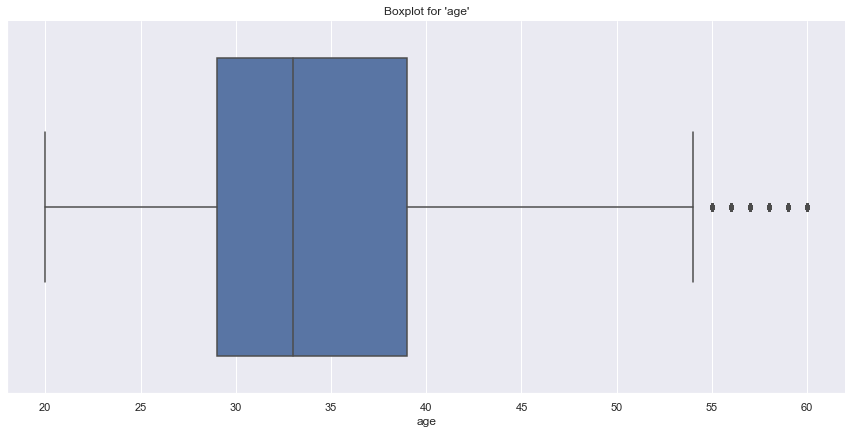

In [180]:
#Boxplot to investigate anomalies in "age"
department_count = sns.catplot(x="age", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'age'")
plt.show()
department_count.savefig("boxplot_age.png")

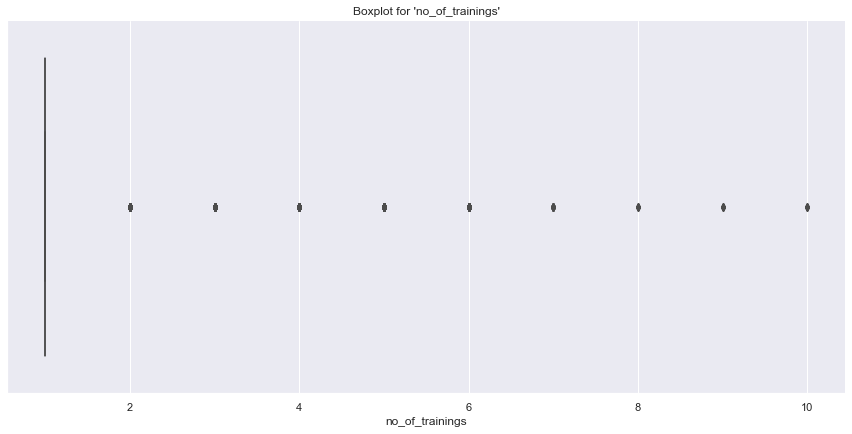

In [181]:
#Boxplot to investigate anomalies in "previous_year_rating"
department_count = sns.catplot(x="no_of_trainings", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'no_of_trainings'")
plt.show()
department_count.savefig("boxplot_trainings.png")

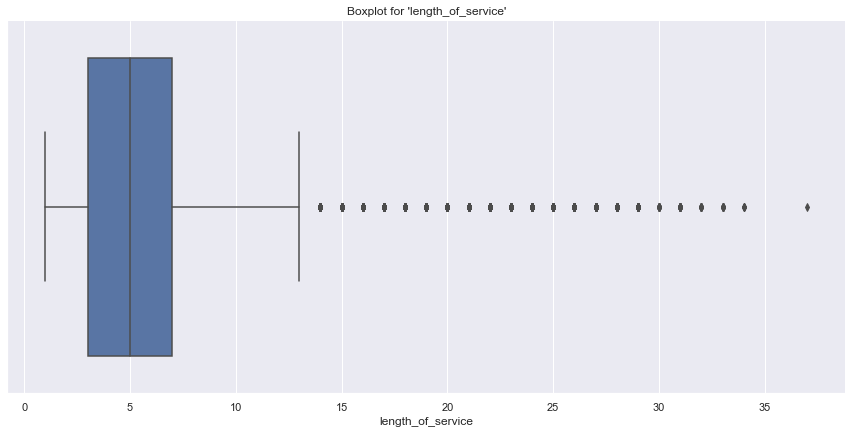

In [182]:
#Boxplot to investigate anomalies in "length_of_service"
department_count = sns.catplot(x="length_of_service", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'length_of_service'")
plt.show()
department_count.savefig("boxplot_service.png")

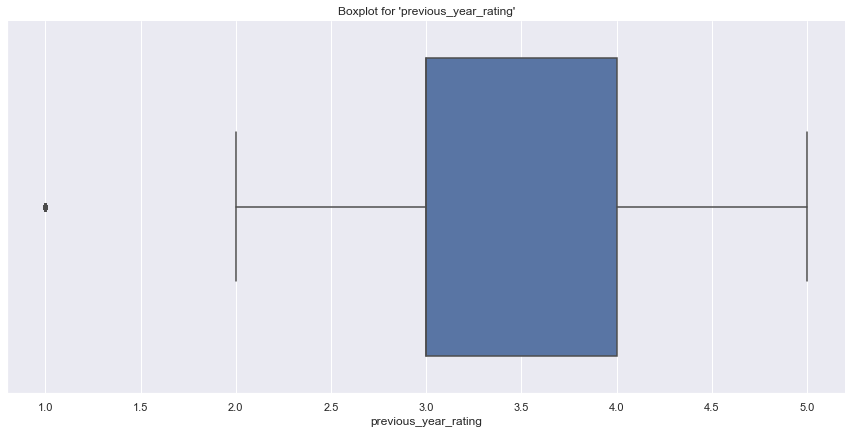

In [183]:
#Boxplot to investigate anomalies in "previous_year_rating"
department_count = sns.catplot(x="previous_year_rating", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'previous_year_rating'")
plt.show()
department_count.savefig("boxplot_rating.png")

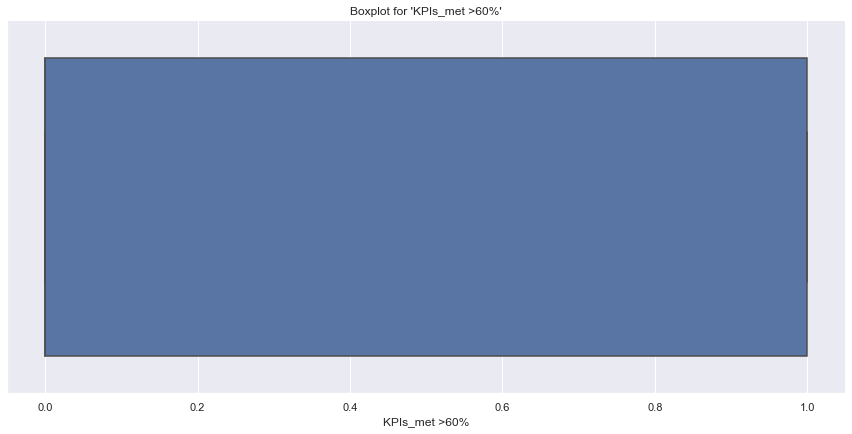

In [184]:
#Boxplot to investigate anomalies in "KPIs_met >60%"
department_count = sns.catplot(x="KPIs_met >60%", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'KPIs_met >60%'")
plt.show()
department_count.savefig("boxplot_KPI.png")

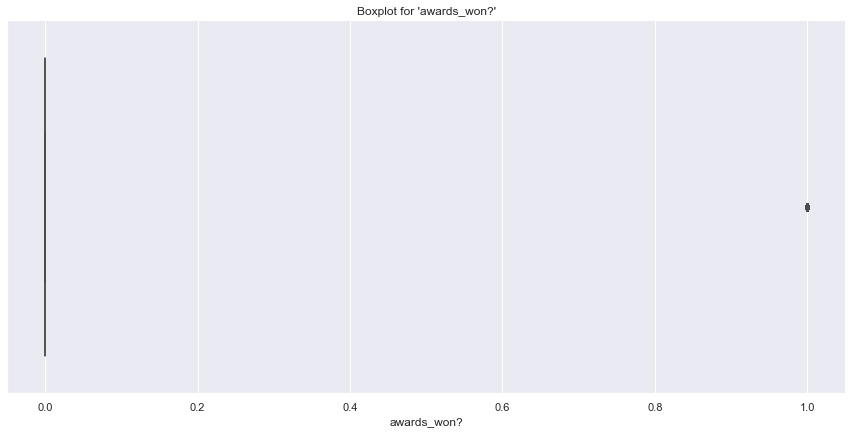

In [185]:
#Boxplot to investigate anomalies in "awards_won?"
department_count = sns.catplot(x="awards_won?", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'awards_won?'")
plt.show()
department_count.savefig("boxplot_awards.png")

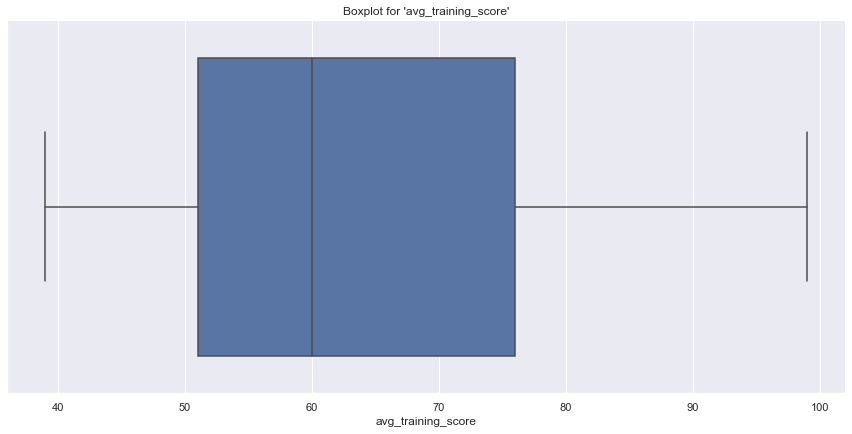

In [186]:
#Boxplot to investigate anomalies in "avg_training_score?"
department_count = sns.catplot(x="avg_training_score", kind="box", height=6, aspect=2, data = trainset_copy)
plt.title("Boxplot for 'avg_training_score'")
plt.show()
department_count.savefig("boxplot_score.png")

### Other Visualisations

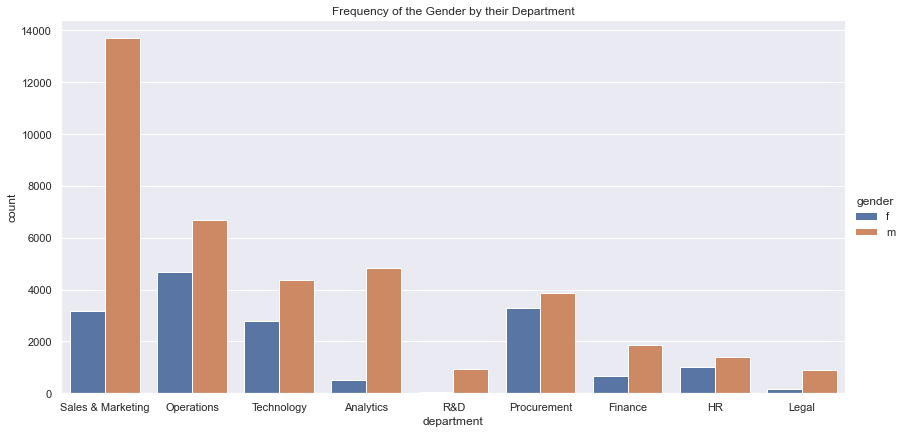

In [187]:
#Countplot showing the freqency of the gender by their department
department_count = sns.catplot(x="department", hue = "gender", kind="count", height=6, aspect=2, data = trainset_copy)
plt.title("Frequency of the Gender by their Department")
plt.show()
department_count.savefig("department_count.png")

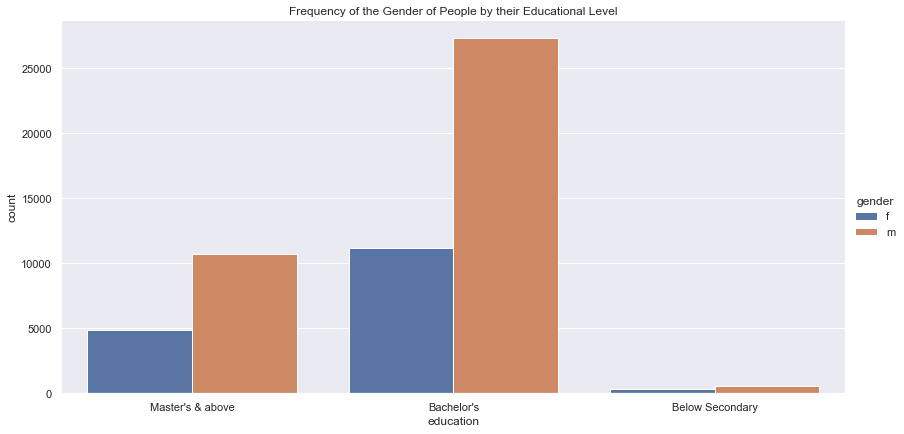

In [188]:
#Countplot showing the freqency of the gender of people by their educational level
education_count = sns.catplot(x="education", hue = 'gender', kind="count", height=6, aspect=2, data = trainset_copy)
plt.title("Frequency of the Gender of People by their Educational Level")
plt.show()
education_count.savefig("education_gender_count.png")

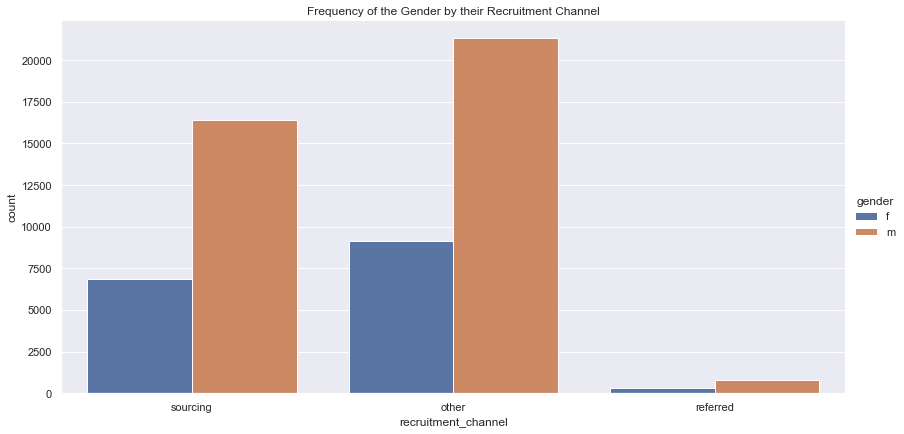

In [189]:
#Countplot showing the freqency of gender by their recuitment channel
recruitment_count = sns.catplot(x="recruitment_channel", hue = "gender", kind="count", height=6, aspect=2, data = trainset_copy)
plt.title("Frequency of the Gender by their Recruitment Channel")
plt.show()
recruitment_count.savefig("recruitment_count.png")

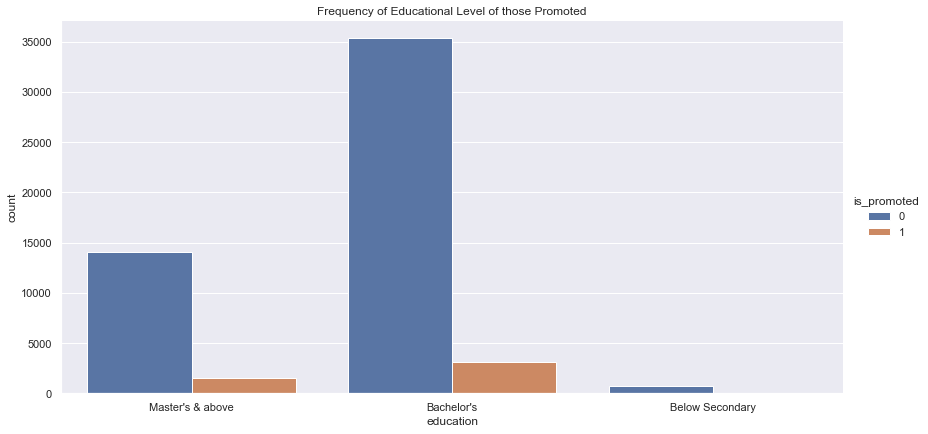

In [190]:
#Countplot of Frequency of Educational Level of those Promoted
education_promoted_count = sns.catplot(data=trainset_copy, x="education", hue="is_promoted", kind="count", height=6, aspect=2)
plt.title("Frequency of Educational Level of those Promoted")
plt.show()
education_promoted_count.savefig("education_promoted_count.png")

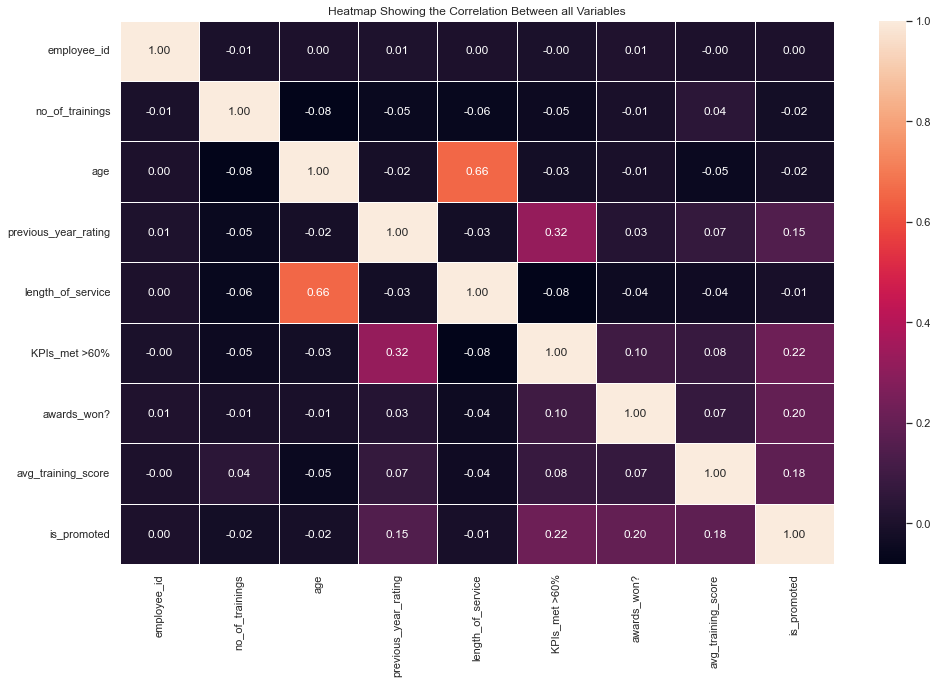

In [191]:
#Heatmap showing the correlation between all variables
plt.figure(figsize=(16,10))
trainset_heatmap = sns.heatmap(data=trainset_copy.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title("Heatmap Showing the Correlation Between all Variables")
plt.savefig("Heatmap.png")
plt.show()

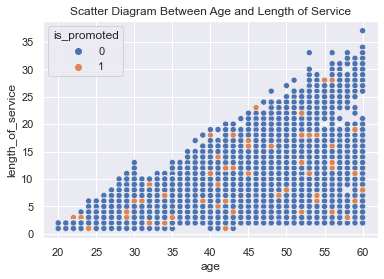

In [192]:
#Graph showing the scatter diagram between all variables
age_scatter = sns.scatterplot(x="age", y="length_of_service", hue="is_promoted", data=trainset_copy)
plt.title("Scatter Diagram Between Age and Length of Service")
plt.show()

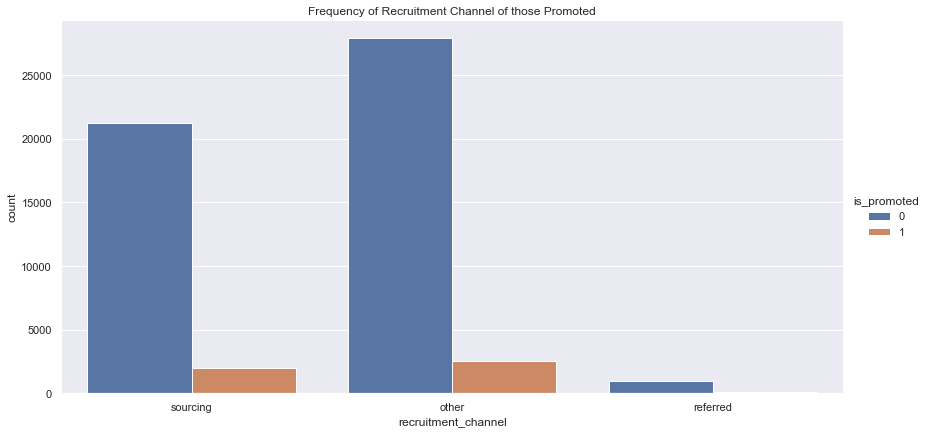

In [193]:
#Graph of Frequency of Recruitment Channel of those Promoted
recruitment_promoted = sns.catplot(data=trainset_copy, x="recruitment_channel", hue="is_promoted", kind="count", height=6, aspect=2)
plt.title("Frequency of Recruitment Channel of those Promoted")
plt.show()
recruitment_promoted.savefig("recruitment_promoted.png")

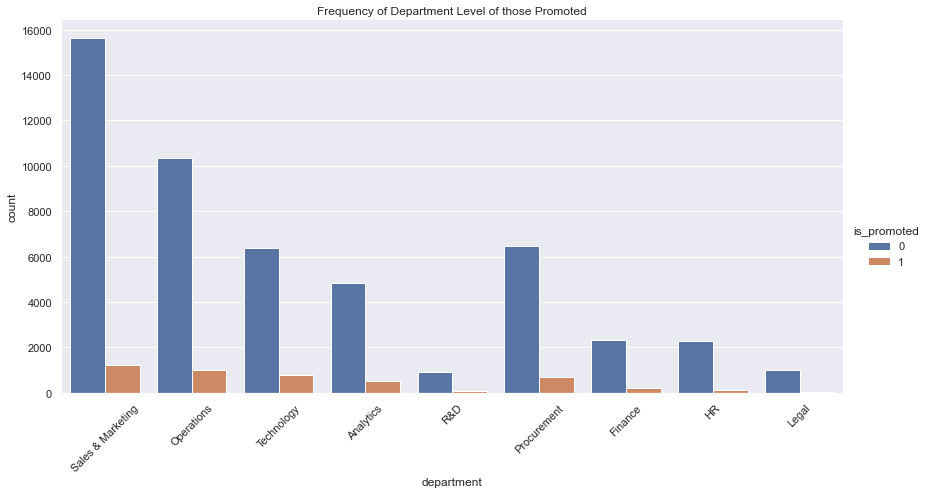

In [194]:
#Graph of Frequency of Department Level of those Promoted
department_promoted = sns.catplot(data=trainset_copy, x="department", hue="is_promoted", kind="count", height=6, aspect=2)
plt.title("Frequency of Department Level of those Promoted")
plt.xticks(rotation=45)
plt.show()
department_promoted.savefig("department_promoted.png")

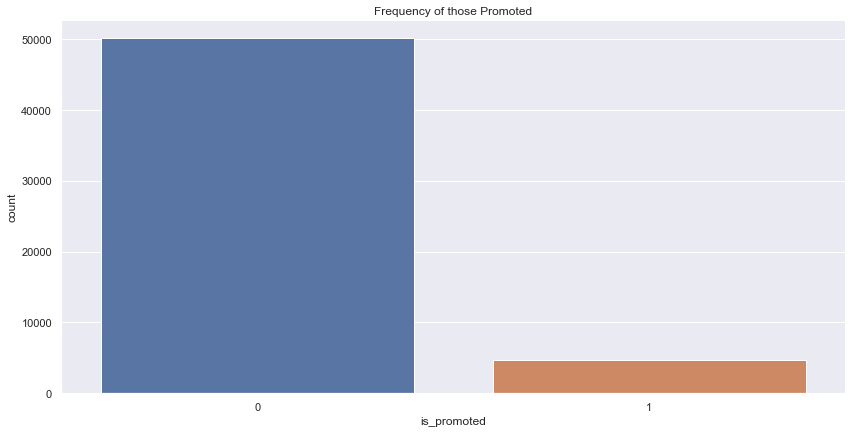

In [195]:
#Graph of Frequency of those Promoted
is_promoted = sns.catplot(data=trainset_copy, x="is_promoted", kind="count", height=6, aspect=2)
plt.title("Frequency of those Promoted")
plt.show()
is_promoted.savefig("is_promoted.png")

# Catboost Classifier Model 

## Feature Selection

In [196]:
X = trainset_copy.drop(["employee_id", "is_promoted"], axis=1)
y = trainset_copy["is_promoted"]

### Build the Model

In [197]:
#Build the Model
cate_features_index = np.where((X.dtypes != float) & (X.dtypes != int))[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1200)

cat = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=40, loss_function='MultiClass', learning_rate = 0.674, iterations = 700, depth = 4, bagging_temperature=3, one_hot_max_size=2)
cat.fit(X_train, y_train, cat_features=cate_features_index, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.9170352	test: 0.9164437	best: 0.9164437 (0)	total: 417ms	remaining: 4m 51s
1:	learn: 0.9234105	test: 0.9238628	best: 0.9238628 (1)	total: 573ms	remaining: 3m 20s
2:	learn: 0.9396814	test: 0.9419849	best: 0.9419849 (2)	total: 700ms	remaining: 2m 42s
3:	learn: 0.9405615	test: 0.9427147	best: 0.9427147 (3)	total: 803ms	remaining: 2m 19s
4:	learn: 0.9398746	test: 0.9424714	best: 0.9427147 (3)	total: 926ms	remaining: 2m 8s
5:	learn: 0.9400893	test: 0.9427147	best: 0.9427147 (3)	total: 1.05s	remaining: 2m 1s
6:	learn: 0.9405615	test: 0.9428363	best: 0.9428363 (6)	total: 1.11s	remaining: 1m 50s
7:	learn: 0.9402610	test: 0.9423498	best: 0.9428363 (6)	total: 1.2s	remaining: 1m 43s
8:	learn: 0.9405830	test: 0.9425930	best: 0.9428363 (6)	total: 1.31s	remaining: 1m 40s
9:	learn: 0.9406259	test: 0.9425930	best: 0.9428363 (6)	total: 1.39s	remaining: 1m 36s
10:	learn: 0.9410982	test: 0.9429579	best: 0.9429579 (10)	total: 1.5s	remaining: 1m 33s
11:	learn: 0.9410553	test: 0.9429579	best: 0.

94:	learn: 0.9424505	test: 0.9433228	best: 0.9434444 (83)	total: 8.22s	remaining: 52.4s
95:	learn: 0.9423432	test: 0.9433228	best: 0.9434444 (83)	total: 8.3s	remaining: 52.2s
96:	learn: 0.9423432	test: 0.9433228	best: 0.9434444 (83)	total: 8.39s	remaining: 52.1s
97:	learn: 0.9424291	test: 0.9433228	best: 0.9434444 (83)	total: 8.46s	remaining: 52s
98:	learn: 0.9425578	test: 0.9430795	best: 0.9434444 (83)	total: 8.54s	remaining: 51.9s
99:	learn: 0.9424720	test: 0.9429579	best: 0.9434444 (83)	total: 8.62s	remaining: 51.7s
100:	learn: 0.9424720	test: 0.9429579	best: 0.9434444 (83)	total: 8.7s	remaining: 51.6s
101:	learn: 0.9424291	test: 0.9429579	best: 0.9434444 (83)	total: 8.76s	remaining: 51.4s
102:	learn: 0.9424935	test: 0.9429579	best: 0.9434444 (83)	total: 8.84s	remaining: 51.2s
103:	learn: 0.9424720	test: 0.9429579	best: 0.9434444 (83)	total: 8.91s	remaining: 51.1s
104:	learn: 0.9424720	test: 0.9429579	best: 0.9434444 (83)	total: 9.01s	remaining: 51s
105:	learn: 0.9424720	test: 0.942

189:	learn: 0.9436741	test: 0.9433228	best: 0.9438093 (163)	total: 15.6s	remaining: 42s
190:	learn: 0.9436955	test: 0.9434444	best: 0.9438093 (163)	total: 15.7s	remaining: 41.9s
191:	learn: 0.9436311	test: 0.9434444	best: 0.9438093 (163)	total: 15.8s	remaining: 41.8s
192:	learn: 0.9437599	test: 0.9434444	best: 0.9438093 (163)	total: 15.9s	remaining: 41.8s
193:	learn: 0.9437814	test: 0.9433228	best: 0.9438093 (163)	total: 16s	remaining: 41.7s
194:	learn: 0.9438458	test: 0.9433228	best: 0.9438093 (163)	total: 16.1s	remaining: 41.6s
195:	learn: 0.9438887	test: 0.9433228	best: 0.9438093 (163)	total: 16.1s	remaining: 41.5s
196:	learn: 0.9437814	test: 0.9433228	best: 0.9438093 (163)	total: 16.2s	remaining: 41.4s
197:	learn: 0.9437814	test: 0.9434444	best: 0.9438093 (163)	total: 16.3s	remaining: 41.3s
198:	learn: 0.9437814	test: 0.9435660	best: 0.9438093 (163)	total: 16.4s	remaining: 41.2s
199:	learn: 0.9438029	test: 0.9434444	best: 0.9438093 (163)	total: 16.4s	remaining: 41.1s
200:	learn: 0.

281:	learn: 0.9445112	test: 0.9435660	best: 0.9438093 (163)	total: 23s	remaining: 34.1s
282:	learn: 0.9445112	test: 0.9435660	best: 0.9438093 (163)	total: 23.1s	remaining: 34s
283:	learn: 0.9446186	test: 0.9438093	best: 0.9438093 (163)	total: 23.1s	remaining: 33.9s
284:	learn: 0.9446830	test: 0.9438093	best: 0.9438093 (163)	total: 23.2s	remaining: 33.8s
285:	learn: 0.9448117	test: 0.9435660	best: 0.9438093 (163)	total: 23.3s	remaining: 33.7s
286:	learn: 0.9448332	test: 0.9435660	best: 0.9438093 (163)	total: 23.4s	remaining: 33.6s
287:	learn: 0.9447903	test: 0.9434444	best: 0.9438093 (163)	total: 23.4s	remaining: 33.5s
288:	learn: 0.9447903	test: 0.9435660	best: 0.9438093 (163)	total: 23.5s	remaining: 33.4s
289:	learn: 0.9447903	test: 0.9435660	best: 0.9438093 (163)	total: 23.6s	remaining: 33.3s
290:	learn: 0.9447473	test: 0.9435660	best: 0.9438093 (163)	total: 23.7s	remaining: 33.3s
291:	learn: 0.9447473	test: 0.9436877	best: 0.9438093 (163)	total: 23.7s	remaining: 33.2s
292:	learn: 0.

373:	learn: 0.9458206	test: 0.9428363	best: 0.9439309 (296)	total: 30.3s	remaining: 26.5s
374:	learn: 0.9458206	test: 0.9428363	best: 0.9439309 (296)	total: 30.4s	remaining: 26.4s
375:	learn: 0.9457562	test: 0.9428363	best: 0.9439309 (296)	total: 30.5s	remaining: 26.3s
376:	learn: 0.9457133	test: 0.9427147	best: 0.9439309 (296)	total: 30.6s	remaining: 26.2s
377:	learn: 0.9457777	test: 0.9425930	best: 0.9439309 (296)	total: 30.7s	remaining: 26.1s
378:	learn: 0.9458206	test: 0.9428363	best: 0.9439309 (296)	total: 30.7s	remaining: 26s
379:	learn: 0.9457562	test: 0.9430795	best: 0.9439309 (296)	total: 30.8s	remaining: 26s
380:	learn: 0.9458206	test: 0.9430795	best: 0.9439309 (296)	total: 30.9s	remaining: 25.9s
381:	learn: 0.9458636	test: 0.9432012	best: 0.9439309 (296)	total: 31s	remaining: 25.8s
382:	learn: 0.9458636	test: 0.9432012	best: 0.9439309 (296)	total: 31.1s	remaining: 25.7s
383:	learn: 0.9459065	test: 0.9432012	best: 0.9439309 (296)	total: 31.2s	remaining: 25.7s
384:	learn: 0.94

465:	learn: 0.9469368	test: 0.9424714	best: 0.9439309 (296)	total: 38s	remaining: 19.1s
466:	learn: 0.9469798	test: 0.9424714	best: 0.9439309 (296)	total: 38.1s	remaining: 19s
467:	learn: 0.9469368	test: 0.9425930	best: 0.9439309 (296)	total: 38.2s	remaining: 18.9s
468:	learn: 0.9469154	test: 0.9424714	best: 0.9439309 (296)	total: 38.3s	remaining: 18.9s
469:	learn: 0.9468295	test: 0.9424714	best: 0.9439309 (296)	total: 38.4s	remaining: 18.8s
470:	learn: 0.9468081	test: 0.9424714	best: 0.9439309 (296)	total: 38.4s	remaining: 18.7s
471:	learn: 0.9468295	test: 0.9424714	best: 0.9439309 (296)	total: 38.5s	remaining: 18.6s
472:	learn: 0.9469368	test: 0.9423498	best: 0.9439309 (296)	total: 38.6s	remaining: 18.5s
473:	learn: 0.9468939	test: 0.9421065	best: 0.9439309 (296)	total: 38.7s	remaining: 18.4s
474:	learn: 0.9468939	test: 0.9423498	best: 0.9439309 (296)	total: 38.8s	remaining: 18.4s
475:	learn: 0.9469583	test: 0.9423498	best: 0.9439309 (296)	total: 38.8s	remaining: 18.3s
476:	learn: 0.

558:	learn: 0.9477096	test: 0.9428363	best: 0.9439309 (296)	total: 46.9s	remaining: 11.8s
559:	learn: 0.9477525	test: 0.9427147	best: 0.9439309 (296)	total: 47s	remaining: 11.7s
560:	learn: 0.9477096	test: 0.9425930	best: 0.9439309 (296)	total: 47.1s	remaining: 11.7s
561:	learn: 0.9476881	test: 0.9425930	best: 0.9439309 (296)	total: 47.1s	remaining: 11.6s
562:	learn: 0.9477096	test: 0.9424714	best: 0.9439309 (296)	total: 47.2s	remaining: 11.5s
563:	learn: 0.9477311	test: 0.9423498	best: 0.9439309 (296)	total: 47.3s	remaining: 11.4s
564:	learn: 0.9477740	test: 0.9422282	best: 0.9439309 (296)	total: 47.4s	remaining: 11.3s
565:	learn: 0.9477740	test: 0.9424714	best: 0.9439309 (296)	total: 47.4s	remaining: 11.2s
566:	learn: 0.9478384	test: 0.9424714	best: 0.9439309 (296)	total: 47.5s	remaining: 11.1s
567:	learn: 0.9477525	test: 0.9425930	best: 0.9439309 (296)	total: 47.6s	remaining: 11.1s
568:	learn: 0.9478384	test: 0.9423498	best: 0.9439309 (296)	total: 47.7s	remaining: 11s
569:	learn: 0.

650:	learn: 0.9488902	test: 0.9423498	best: 0.9439309 (296)	total: 54.3s	remaining: 4.08s
651:	learn: 0.9489117	test: 0.9422282	best: 0.9439309 (296)	total: 54.4s	remaining: 4s
652:	learn: 0.9489117	test: 0.9424714	best: 0.9439309 (296)	total: 54.5s	remaining: 3.92s
653:	learn: 0.9489761	test: 0.9423498	best: 0.9439309 (296)	total: 54.6s	remaining: 3.84s
654:	learn: 0.9487614	test: 0.9423498	best: 0.9439309 (296)	total: 54.7s	remaining: 3.75s
655:	learn: 0.9488044	test: 0.9424714	best: 0.9439309 (296)	total: 54.7s	remaining: 3.67s
656:	learn: 0.9488044	test: 0.9427147	best: 0.9439309 (296)	total: 54.8s	remaining: 3.59s
657:	learn: 0.9488902	test: 0.9427147	best: 0.9439309 (296)	total: 54.9s	remaining: 3.51s
658:	learn: 0.9488902	test: 0.9429579	best: 0.9439309 (296)	total: 55s	remaining: 3.42s
659:	learn: 0.9489117	test: 0.9428363	best: 0.9439309 (296)	total: 55.1s	remaining: 3.34s
660:	learn: 0.9489332	test: 0.9429579	best: 0.9439309 (296)	total: 55.2s	remaining: 3.26s
661:	learn: 0.9

### First Predictions and Evaluation

The Test Accuracy is :			0.943931
----------------------------------------------
The f1_score:  [0.9701869  0.53007136]
----------------------------------------------


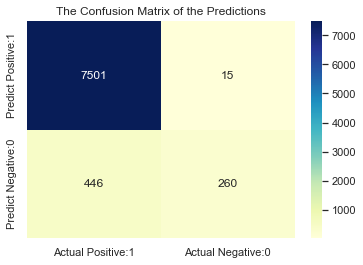

In [198]:
print('The Test Accuracy is :\t\t\t{:.6f}'.format(accuracy_score(y_test, cat.predict(X_test))))
predcat = cat.predict(X_test)
print("----------------------------------------------")
print(f"The f1_score: ", f1_score(y_test, cat.predict(X_test), average=None))

print("----------------------------------------------")

#The Confusion Matrix of the Predictions
cm = confusion_matrix(y_test, cat.predict(X_test), labels=[0, 1])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions")
plt.savefig("first_confusion.png")
plt.show()

### Summary of First Predictions

0    22756
1      734
dtype: int64


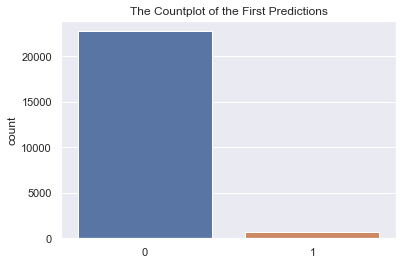

In [199]:
#Summary of First Predictions
testset_copy = testset_copy.drop("employee_id", axis=1)
preds = cat.predict(testset_copy)
pred1 = preds.flatten()
predlst = pred1.tolist()
first_predictions = pd.DataFrame({"employee_id": testset.employee_id , "is_promoted": predlst})
first_predictions.to_csv("first_predictions.csv", index=False)
print(pd.Series(predlst).value_counts())
first_predictions_image = sns.countplot(predlst)
plt.title("The Countplot of the First Predictions")
plt.savefig("first_counts.png")

In [200]:
#The Classification Report
print("The Classification Report")
print(classification_report(y_test, cat.predict(X_test)))

The Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7516
           1       0.95      0.37      0.53       706

    accuracy                           0.94      8222
   macro avg       0.94      0.68      0.75      8222
weighted avg       0.94      0.94      0.93      8222



In [201]:
# So We Were able to Predict that 718 were promoted while 22772 were not, which is on a model Accuracy of 94

In [202]:
# export the cleaned data set for model deployment
trainset_copy.to_csv("trainset_cleaned.csv", index=False)
testset_copy.to_csv("testset_cleaned.csv", index=False)

In [203]:
import site
print (site.getsitepackages())

['C:\\Users\\Williams\\anaconda3', 'C:\\Users\\Williams\\anaconda3\\lib\\site-packages']


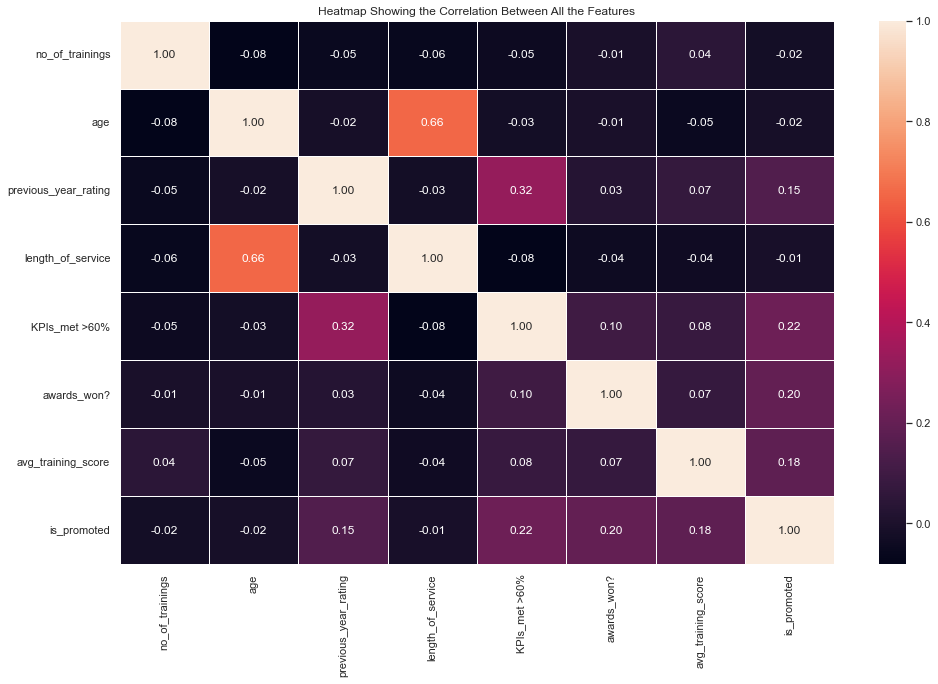

In [204]:
#Heatmap showing the correlation between all variables
heat_train = trainset_copy.drop("employee_id", axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(data=heat_train.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title("Heatmap Showing the Correlation Between All the Features")
plt.savefig("Heatmap.png")
plt.show()

### Re-selecting the Features Based on the Result of the Heatmap

In [205]:
#Reselect the features based on the result of the heatmap
X = trainset_copy.drop(["length_of_service", "previous_year_rating"], axis=1)
y = trainset_copy["is_promoted"]

In [206]:
#Rebuild the CatBoost Model
cate_features_index = np.where(X.dtypes != float)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1200)


cat = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=40, loss_function='MultiClass', learning_rate = 0.674, iterations = 700, depth = 4, bagging_temperature=3, one_hot_max_size=2)
cat.fit(X_train, y_train, cat_features=cate_features_index, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 110ms	remaining: 1m 16s
1:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 182ms	remaining: 1m 3s
2:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 266ms	remaining: 1m 1s
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 344ms	remaining: 59.9s
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 417ms	remaining: 57.9s
5:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 489ms	remaining: 56.5s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 585ms	remaining: 57.9s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 671ms	remaining: 58s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 755ms	remaining: 58s
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 838ms	remaining: 57.8s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 918ms	remaining: 57.5s
11:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)

95:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.28s	remaining: 39.5s
96:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.34s	remaining: 39.4s
97:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.4s	remaining: 39.3s
98:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.46s	remaining: 39.2s
99:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.53s	remaining: 39.2s
100:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.59s	remaining: 39.1s
101:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.66s	remaining: 39s
102:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.71s	remaining: 38.9s
103:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.77s	remaining: 38.8s
104:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.83s	remaining: 38.7s
105:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 6.89s	remaining: 38.6s
106:	learn: 1.0000000	test: 1.0000000	be

189:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.3s	remaining: 33s
190:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.4s	remaining: 32.9s
191:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.4s	remaining: 32.9s
192:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.5s	remaining: 32.8s
193:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.5s	remaining: 32.7s
194:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.6s	remaining: 32.7s
195:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.7s	remaining: 32.6s
196:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.7s	remaining: 32.5s
197:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.8s	remaining: 32.5s
198:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.9s	remaining: 32.4s
199:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 12.9s	remaining: 32.3s
200:	learn: 1.0000000	test: 1.0000

286:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.6s	remaining: 26.7s
287:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.6s	remaining: 26.6s
288:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.7s	remaining: 26.6s
289:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.8s	remaining: 26.5s
290:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.8s	remaining: 26.4s
291:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.9s	remaining: 26.4s
292:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19s	remaining: 26.3s
293:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19s	remaining: 26.3s
294:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.1s	remaining: 26.2s
295:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.2s	remaining: 26.2s
296:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 19.2s	remaining: 26.1s
297:	learn: 1.0000000	test: 1.000000

382:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.1s	remaining: 20.8s
383:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.3s	remaining: 20.8s
384:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.6s	remaining: 21s
385:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 25.8s	remaining: 21s
386:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26s	remaining: 21s
387:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.2s	remaining: 21s
388:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.2s	remaining: 21s
389:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.3s	remaining: 20.9s
390:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.4s	remaining: 20.9s
391:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.5s	remaining: 20.8s
392:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.6s	remaining: 20.8s
393:	learn: 1.0000000	test: 1.0000000	best: 

478:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 33.7s	remaining: 15.5s
479:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 33.7s	remaining: 15.5s
480:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 33.8s	remaining: 15.4s
481:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 33.8s	remaining: 15.3s
482:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 33.9s	remaining: 15.2s
483:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34s	remaining: 15.2s
484:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34.1s	remaining: 15.1s
485:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34.1s	remaining: 15s
486:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34.2s	remaining: 15s
487:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34.2s	remaining: 14.9s
488:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 34.3s	remaining: 14.8s
489:	learn: 1.0000000	test: 1.0000000	

573:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 39.6s	remaining: 8.7s
574:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 39.7s	remaining: 8.63s
575:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 39.7s	remaining: 8.55s
576:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 39.8s	remaining: 8.49s
577:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 39.9s	remaining: 8.42s
578:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40s	remaining: 8.35s
579:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40s	remaining: 8.28s
580:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40.1s	remaining: 8.21s
581:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40.1s	remaining: 8.14s
582:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40.2s	remaining: 8.07s
583:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 40.3s	remaining: 8s
584:	learn: 1.0000000	test: 1.0000000	be

668:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45.8s	remaining: 2.12s
669:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45.8s	remaining: 2.05s
670:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 45.9s	remaining: 1.98s
671:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46s	remaining: 1.92s
672:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46s	remaining: 1.85s
673:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.1s	remaining: 1.78s
674:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.2s	remaining: 1.71s
675:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.2s	remaining: 1.64s
676:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.3s	remaining: 1.57s
677:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.4s	remaining: 1.5s
678:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 46.4s	remaining: 1.44s
679:	learn: 1.0000000	test: 1.0000000

### Second Predictions and Evaluation

The Test Accuracy is :			1.000000
----------------------------------------------
The f1_score:  [1. 1.]
----------------------------------------------


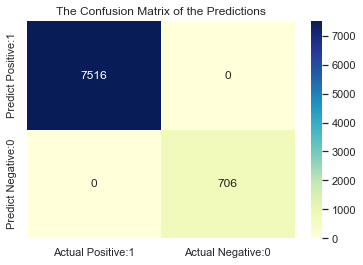

In [207]:
#Make predictions on the test dataset
print('The Test Accuracy is :\t\t\t{:.6f}'.format(accuracy_score(y_test, cat.predict(X_test))))
predcat = cat.predict(X_test)
print("----------------------------------------------")
print(f"The f1_score: ", f1_score(y_test, cat.predict(X_test), average=None))

print("----------------------------------------------")

#The Confusion Matrix of the Predictions
cm = confusion_matrix(y_test, cat.predict(X_test), labels=[0, 1])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions")
plt.savefig("second_confusion.png")
plt.show()

In [208]:
#The Classification Report
print("The Classification Report")
print(classification_report(y_test, cat.predict(X_test)))

The Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7516
           1       1.00      1.00      1.00       706

    accuracy                           1.00      8222
   macro avg       1.00      1.00      1.00      8222
weighted avg       1.00      1.00      1.00      8222



# Other Classifier Models

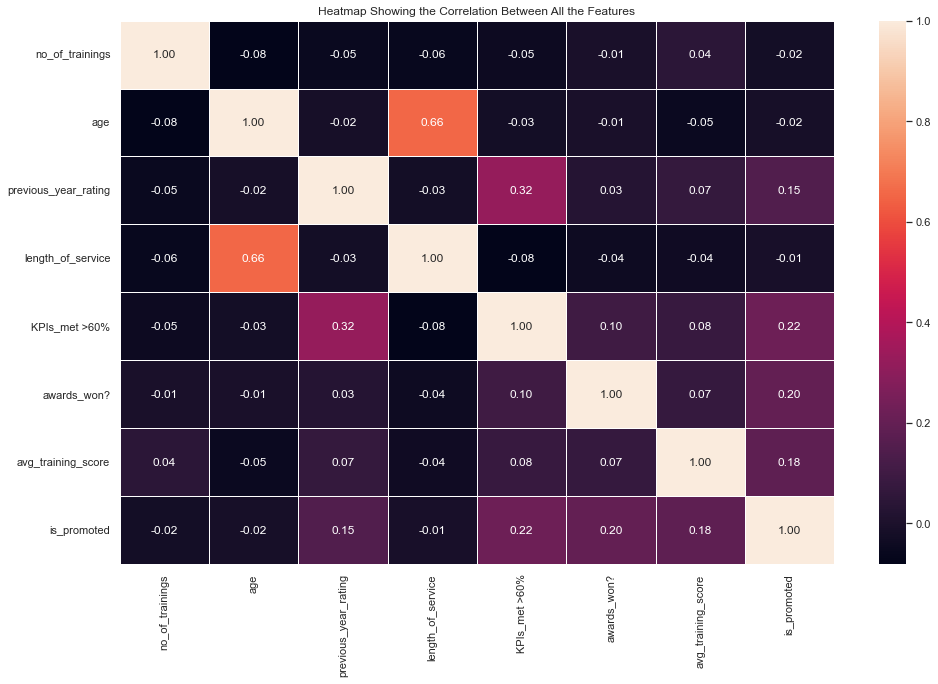

In [209]:
#Heatmap showing the correlation between all variables
heat_train = trainset_copy.drop("employee_id", axis=1)
plt.figure(figsize=(16,10))
sns.heatmap(data=heat_train.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title("Heatmap Showing the Correlation Between All the Features")
plt.show()

## Encoding Some Categorical Variables

In [210]:
#inspect the values in the "region" column
trainset_copy.groupby("is_promoted").get_group(0)["region"].value_counts().head()

region_2     11354
region_22     5694
region_7      4327
region_15     2586
region_13     2418
Name: region, dtype: int64

In [211]:
#replace the values in the "region" column with only numbers
trainset_copy["region"] = trainset_copy["region"].str.split("_", expand=True)[1]

In [212]:
#change the data type of "region" from "object" to "int32"
trainset_copy["region"] = trainset_copy["region"].astype("int32")

In [213]:
#Inspect the dataset
trainset_copy

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,14,Bachelor's,m,sourcing,1,48,3.00,17,0,0,78,0
54804,74592,Operations,27,Master's & above,f,other,1,37,2.00,6,0,0,56,0
54805,13918,Analytics,1,Bachelor's,m,other,1,27,5.00,3,1,0,79,0
54806,13614,Sales & Marketing,9,Master's & above,m,sourcing,1,29,1.00,2,0,0,45,0


In [214]:
trainset_copy["department"].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [215]:
trainset_copy["education"].value_counts()

Bachelor's          38412
Master's & above    15574
Below Secondary       822
Name: education, dtype: int64

In [216]:
trainset_copy["gender"].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [217]:
trainset_copy["recruitment_channel"].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [218]:
def department_int(dept):
    dept_dict = {"Sales & Marketing": 1, "Operations":2, "Procurement":3, "Technology":4, "Analytics":5, "Finance":6, "HR":7, "Legal":8, "R&D":9}
    return dept_dict[dept]

In [219]:
def education_int(edu):
    edu_dict = {"Master's & above": 1, "Bachelor's":2, "Below Secondary":3}
    return edu_dict[edu]

In [220]:
def gender_int(gender):
    gender_dict = {"m": 1, "f":2}
    return gender_dict[gender]

In [221]:
def channel_int(channel):
    channel_dict = {"sourcing": 1, "referred":2, "other":3}
    return channel_dict[channel]

In [222]:
trainset_copy["department"] = trainset_copy["department"].apply(lambda x: department_int(x))

In [223]:
trainset_copy["education"] = trainset_copy["education"].apply(lambda x: education_int(x))

In [224]:
trainset_copy["gender"] = trainset_copy["gender"].apply(lambda x: gender_int(x))

In [225]:
trainset_copy["recruitment_channel"] = trainset_copy["recruitment_channel"].apply(lambda x: channel_int(x))

In [226]:
#inspect the dataset
trainset_copy

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
0,65438,1,7,1,2,1,1,35,5.00,8,1,0,49,0
1,65141,2,22,2,1,3,1,30,5.00,4,0,0,60,0
2,7513,1,19,2,1,1,1,34,3.00,7,0,0,50,0
3,2542,1,23,2,1,3,2,39,1.00,10,0,0,50,0
4,48945,4,26,2,1,3,1,45,3.00,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,4,14,2,1,1,1,48,3.00,17,0,0,78,0
54804,74592,2,27,1,2,3,1,37,2.00,6,0,0,56,0
54805,13918,5,1,2,1,3,1,27,5.00,3,1,0,79,0
54806,13614,1,9,1,1,1,1,29,1.00,2,0,0,45,0


## Feature Selection

In [227]:
#Feature Selection based on the result of the heatmap including the categorical variables
X = trainset_copy.drop(["employee_id", "no_of_trainings", "length_of_service", "is_promoted"], axis=1)
y = trainset_copy["is_promoted"]

### Split The Dataset

In [228]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1200)

### Oversample and Undersample Imbalanced Dataset

In [229]:
# Undersample and plot imbalanced dataset with the neighborhood cleaning rule
print(f"Before treating imbalance: {Counter(y_train)}")
# oversample
over = RandomOverSampler(sampling_strategy=0.1)
X_train, y_train = over.fit_resample(X_train, y_train)
print(f"After oversampling: \t\t{Counter(y_train)}")
# undersample
under = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train = under.fit_resample(X_train, y_train)
print(f"After undersampling: \t\t{Counter(y_train)}")

Before treating imbalance: Counter({0: 42624, 1: 3962})
After oversampling: 		Counter({0: 42624, 1: 4262})
After undersampling: 		Counter({0: 8524, 1: 4262})


## Inspect Performance of Several Models

In [230]:
#check the best model
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:56<00:00,  1.94s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.86               0.78     0.78      0.88   
XGBClassifier                      0.86               0.78     0.78      0.88   
RandomForestClassifier             0.85               0.75     0.75      0.87   
BaggingClassifier                  0.86               0.75     0.75      0.88   
DecisionTreeClassifier             0.82               0.75     0.75      0.85   
PassiveAggressiveClassifier        0.73               0.74     0.74      0.79   
ExtraTreesClassifier               0.84               0.73     0.73      0.86   
SVC                                0.86               0.73     0.73      0.88   
NuSVC                              0.86               0.73     0.73      0.88   
NearestCentroid                    0.72               0.72     0.72      0.78   
Perceptron                  

## Algorithms of some Models

In [231]:
def Model(X_train, y_train, model):

    #scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    if model == 1:
        #train the Logistic Regression model
        from sklearn.linear_model import LogisticRegression
        reg = LogisticRegression()
        reg.fit(X_train, y_train)
        print("Logistic Regression DONE...")
        
    elif model == 2:
        #train the Support Vector Machine model
        from sklearn.svm import SVC
        reg = SVC(kernel = "linear")
        reg.fit(X_train, y_train)
        print("Support Vector Machine DONE...")
    elif model == 3:    
        #train the Decision Tree model
        from sklearn.tree import DecisionTreeClassifier
        reg = DecisionTreeClassifier()
        reg.fit(X_train, y_train)
        print("Decision Tree Classifier DONE...")
    elif model == 4:
        #train the Random Forest model
        from sklearn.ensemble import RandomForestClassifier
        reg = RandomForestClassifier(random_state=0)
        reg.fit(X_train, y_train)
        print("Random Forest Classifier DONE...")
    elif model == 5:
        #train the BaggingClassifier model
        from sklearn.ensemble import BaggingClassifier
        reg = BaggingClassifier()
        reg.fit(X_train, y_train)
        print("BaggingClassifier DONE...")
    return reg

In [232]:
#call the model function and unpack it for Random Forest Classifier
reg_type=int(input("Enter 1 for Logistic Regression: \nEnter 2 for Support Vector Machine: \nEnter 3 for Decision Tree Classifier: \nEnter 4 for Random Forest Classifier: \nEnter 5 for Bagging Classifier:\n\n"))
reg = Model(X_train, y_train, reg_type)

Enter 1 for Logistic Regression: 
Enter 2 for Support Vector Machine: 
Enter 3 for Decision Tree Classifier: 
Enter 4 for Random Forest Classifier: 
Enter 5 for Bagging Classifier:

4
Random Forest Classifier DONE...


## Prediction and Performance Evaluation

The Test Accuracy is :			0.848090
----------------------------------------------
The f1_score:  [0.91263902 0.41825803]
----------------------------------------------


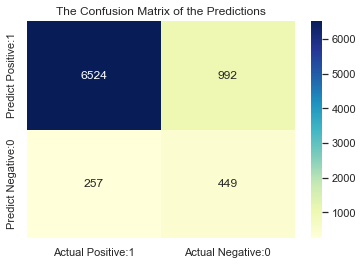

In [233]:
#predict the output of the Validation dataset
print("The Test Accuracy is :\t\t\t{:.6f}".format(accuracy_score(y_test, reg.predict(X_test))))
predcat = reg.predict(X_test)
print("----------------------------------------------")
print(f"The f1_score: ", f1_score(y_test, reg.predict(X_test), average=None))

print("----------------------------------------------")

#The Confusion Matrix of the Predictions
cm = confusion_matrix(y_test, reg.predict(X_test), labels=[0, 1])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions")
plt.savefig("third_confusion.png")
plt.show()

In [234]:
#The Classification Report
print("The Classification Report")
print(classification_report(y_test, reg.predict(X_test)))

The Classification Report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7516
           1       0.31      0.64      0.42       706

    accuracy                           0.85      8222
   macro avg       0.64      0.75      0.67      8222
weighted avg       0.91      0.85      0.87      8222



In [235]:
#Trying out different models are not any better
#So we stick to the first CATBOOST model

In [236]:
trainset_copy.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >60%,awards_won?,avg_training_score,is_promoted
0,65438,1,7,1,2,1,1,35,5.00,8,1,0,49,0
1,65141,2,22,2,1,3,1,30,5.00,4,0,0,60,0
2,7513,1,19,2,1,1,1,34,3.00,7,0,0,50,0
3,2542,1,23,2,1,3,2,39,1.00,10,0,0,50,0
4,48945,4,26,2,1,3,1,45,3.00,2,0,0,73,0


In [237]:
#Feature Selection based on the result of the heatmap including the categorical variables
X = trainset_copy.drop(["no_of_trainings", "previous_year_rating", "length_of_service", "is_promoted"], axis=1)
y = trainset_copy["is_promoted"]

In [238]:
#Rebuild the CatBoost Model
cate_features_index = np.where(X.dtypes != float)[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=1200)


cat = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True, random_seed=40, loss_function='MultiClass', learning_rate = 0.674, iterations = 700, depth = 4, bagging_temperature=3, one_hot_max_size=2)
cat.fit(X_train, y_train, cat_features=cate_features_index, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 0.9394453	test: 0.9425930	best: 0.9425930 (0)	total: 143ms	remaining: 1m 39s
1:	learn: 0.9399390	test: 0.9425930	best: 0.9425930 (0)	total: 293ms	remaining: 1m 42s
2:	learn: 0.9401966	test: 0.9425930	best: 0.9425930 (0)	total: 433ms	remaining: 1m 40s
3:	learn: 0.9396171	test: 0.9422282	best: 0.9425930 (0)	total: 611ms	remaining: 1m 46s
4:	learn: 0.9399390	test: 0.9423498	best: 0.9425930 (0)	total: 756ms	remaining: 1m 45s
5:	learn: 0.9399820	test: 0.9423498	best: 0.9425930 (0)	total: 888ms	remaining: 1m 42s
6:	learn: 0.9403254	test: 0.9429579	best: 0.9429579 (6)	total: 1.01s	remaining: 1m 39s
7:	learn: 0.9406689	test: 0.9430795	best: 0.9430795 (7)	total: 1.14s	remaining: 1m 38s
8:	learn: 0.9408621	test: 0.9429579	best: 0.9430795 (7)	total: 1.26s	remaining: 1m 37s
9:	learn: 0.9408191	test: 0.9430795	best: 0.9430795 (7)	total: 1.38s	remaining: 1m 35s
10:	learn: 0.9407977	test: 0.9430795	best: 0.9430795 (7)	total: 1.49s	remaining: 1m 33s
11:	learn: 0.9407762	test: 0.9428363	best:

95:	learn: 0.9423861	test: 0.9429579	best: 0.9432012 (37)	total: 9.81s	remaining: 1m 1s
96:	learn: 0.9423003	test: 0.9428363	best: 0.9432012 (37)	total: 9.89s	remaining: 1m 1s
97:	learn: 0.9423861	test: 0.9430795	best: 0.9432012 (37)	total: 9.96s	remaining: 1m 1s
98:	learn: 0.9423861	test: 0.9428363	best: 0.9432012 (37)	total: 10.1s	remaining: 1m 1s
99:	learn: 0.9424505	test: 0.9427147	best: 0.9432012 (37)	total: 10.1s	remaining: 1m
100:	learn: 0.9424291	test: 0.9427147	best: 0.9432012 (37)	total: 10.2s	remaining: 1m
101:	learn: 0.9424505	test: 0.9427147	best: 0.9432012 (37)	total: 10.3s	remaining: 1m
102:	learn: 0.9424076	test: 0.9428363	best: 0.9432012 (37)	total: 10.4s	remaining: 1m
103:	learn: 0.9424076	test: 0.9428363	best: 0.9432012 (37)	total: 10.5s	remaining: 1m
104:	learn: 0.9424076	test: 0.9429579	best: 0.9432012 (37)	total: 10.6s	remaining: 1m
105:	learn: 0.9424076	test: 0.9429579	best: 0.9432012 (37)	total: 10.7s	remaining: 1m
106:	learn: 0.9424076	test: 0.9429579	best: 0.9

191:	learn: 0.9431374	test: 0.9427147	best: 0.9433228 (136)	total: 17.4s	remaining: 46.1s
192:	learn: 0.9431589	test: 0.9427147	best: 0.9433228 (136)	total: 17.5s	remaining: 46s
193:	learn: 0.9430516	test: 0.9427147	best: 0.9433228 (136)	total: 17.6s	remaining: 45.9s
194:	learn: 0.9431160	test: 0.9425930	best: 0.9433228 (136)	total: 17.7s	remaining: 45.8s
195:	learn: 0.9431374	test: 0.9427147	best: 0.9433228 (136)	total: 17.8s	remaining: 45.7s
196:	learn: 0.9431804	test: 0.9425930	best: 0.9433228 (136)	total: 17.9s	remaining: 45.6s
197:	learn: 0.9432018	test: 0.9423498	best: 0.9433228 (136)	total: 18s	remaining: 45.5s
198:	learn: 0.9431804	test: 0.9423498	best: 0.9433228 (136)	total: 18s	remaining: 45.4s
199:	learn: 0.9431589	test: 0.9422282	best: 0.9433228 (136)	total: 18.1s	remaining: 45.3s
200:	learn: 0.9431374	test: 0.9422282	best: 0.9433228 (136)	total: 18.2s	remaining: 45.2s
201:	learn: 0.9431374	test: 0.9422282	best: 0.9433228 (136)	total: 18.3s	remaining: 45.1s
202:	learn: 0.94

283:	learn: 0.9441463	test: 0.9422282	best: 0.9433228 (136)	total: 24.8s	remaining: 36.4s
284:	learn: 0.9442107	test: 0.9422282	best: 0.9433228 (136)	total: 24.9s	remaining: 36.3s
285:	learn: 0.9441892	test: 0.9417417	best: 0.9433228 (136)	total: 25s	remaining: 36.2s
286:	learn: 0.9442107	test: 0.9418633	best: 0.9433228 (136)	total: 25.1s	remaining: 36.1s
287:	learn: 0.9442536	test: 0.9419849	best: 0.9433228 (136)	total: 25.2s	remaining: 36s
288:	learn: 0.9443180	test: 0.9421065	best: 0.9433228 (136)	total: 25.3s	remaining: 35.9s
289:	learn: 0.9443180	test: 0.9422282	best: 0.9433228 (136)	total: 25.3s	remaining: 35.8s
290:	learn: 0.9442966	test: 0.9421065	best: 0.9433228 (136)	total: 25.4s	remaining: 35.7s
291:	learn: 0.9443180	test: 0.9421065	best: 0.9433228 (136)	total: 25.5s	remaining: 35.6s
292:	learn: 0.9443395	test: 0.9419849	best: 0.9433228 (136)	total: 25.6s	remaining: 35.5s
293:	learn: 0.9444039	test: 0.9421065	best: 0.9433228 (136)	total: 25.7s	remaining: 35.5s
294:	learn: 0.

376:	learn: 0.9451337	test: 0.9416200	best: 0.9433228 (136)	total: 32.6s	remaining: 27.9s
377:	learn: 0.9451767	test: 0.9416200	best: 0.9433228 (136)	total: 32.7s	remaining: 27.8s
378:	learn: 0.9451767	test: 0.9416200	best: 0.9433228 (136)	total: 32.8s	remaining: 27.7s
379:	learn: 0.9451552	test: 0.9416200	best: 0.9433228 (136)	total: 32.8s	remaining: 27.7s
380:	learn: 0.9451767	test: 0.9414984	best: 0.9433228 (136)	total: 32.9s	remaining: 27.6s
381:	learn: 0.9451981	test: 0.9414984	best: 0.9433228 (136)	total: 33s	remaining: 27.5s
382:	learn: 0.9451767	test: 0.9417417	best: 0.9433228 (136)	total: 33.1s	remaining: 27.4s
383:	learn: 0.9452625	test: 0.9418633	best: 0.9433228 (136)	total: 33.2s	remaining: 27.3s
384:	learn: 0.9452196	test: 0.9418633	best: 0.9433228 (136)	total: 33.3s	remaining: 27.2s
385:	learn: 0.9452411	test: 0.9417417	best: 0.9433228 (136)	total: 33.4s	remaining: 27.1s
386:	learn: 0.9451767	test: 0.9418633	best: 0.9433228 (136)	total: 33.4s	remaining: 27s
387:	learn: 0.

469:	learn: 0.9460997	test: 0.9416200	best: 0.9433228 (136)	total: 40.1s	remaining: 19.6s
470:	learn: 0.9460782	test: 0.9416200	best: 0.9433228 (136)	total: 40.2s	remaining: 19.5s
471:	learn: 0.9460997	test: 0.9416200	best: 0.9433228 (136)	total: 40.3s	remaining: 19.4s
472:	learn: 0.9461212	test: 0.9414984	best: 0.9433228 (136)	total: 40.4s	remaining: 19.4s
473:	learn: 0.9460782	test: 0.9414984	best: 0.9433228 (136)	total: 40.5s	remaining: 19.3s
474:	learn: 0.9461212	test: 0.9414984	best: 0.9433228 (136)	total: 40.6s	remaining: 19.2s
475:	learn: 0.9461426	test: 0.9414984	best: 0.9433228 (136)	total: 40.7s	remaining: 19.1s
476:	learn: 0.9460997	test: 0.9414984	best: 0.9433228 (136)	total: 40.8s	remaining: 19.1s
477:	learn: 0.9460782	test: 0.9414984	best: 0.9433228 (136)	total: 40.8s	remaining: 19s
478:	learn: 0.9461212	test: 0.9414984	best: 0.9433228 (136)	total: 40.9s	remaining: 18.9s
479:	learn: 0.9460997	test: 0.9414984	best: 0.9433228 (136)	total: 41s	remaining: 18.8s
480:	learn: 0.

563:	learn: 0.9467437	test: 0.9422282	best: 0.9433228 (136)	total: 47.8s	remaining: 11.5s
564:	learn: 0.9467222	test: 0.9422282	best: 0.9433228 (136)	total: 47.9s	remaining: 11.4s
565:	learn: 0.9468081	test: 0.9421065	best: 0.9433228 (136)	total: 48s	remaining: 11.4s
566:	learn: 0.9468510	test: 0.9419849	best: 0.9433228 (136)	total: 48s	remaining: 11.3s
567:	learn: 0.9468081	test: 0.9419849	best: 0.9433228 (136)	total: 48.1s	remaining: 11.2s
568:	learn: 0.9468295	test: 0.9419849	best: 0.9433228 (136)	total: 48.2s	remaining: 11.1s
569:	learn: 0.9468725	test: 0.9419849	best: 0.9433228 (136)	total: 48.3s	remaining: 11s
570:	learn: 0.9468725	test: 0.9419849	best: 0.9433228 (136)	total: 48.4s	remaining: 10.9s
571:	learn: 0.9468939	test: 0.9419849	best: 0.9433228 (136)	total: 48.4s	remaining: 10.8s
572:	learn: 0.9468510	test: 0.9421065	best: 0.9433228 (136)	total: 48.5s	remaining: 10.8s
573:	learn: 0.9469368	test: 0.9422282	best: 0.9433228 (136)	total: 48.6s	remaining: 10.7s
574:	learn: 0.94

655:	learn: 0.9476452	test: 0.9418633	best: 0.9433228 (136)	total: 54.8s	remaining: 3.67s
656:	learn: 0.9476667	test: 0.9418633	best: 0.9433228 (136)	total: 54.9s	remaining: 3.59s
657:	learn: 0.9477096	test: 0.9418633	best: 0.9433228 (136)	total: 54.9s	remaining: 3.5s
658:	learn: 0.9477311	test: 0.9418633	best: 0.9433228 (136)	total: 55s	remaining: 3.42s
659:	learn: 0.9477311	test: 0.9418633	best: 0.9433228 (136)	total: 55.1s	remaining: 3.34s
660:	learn: 0.9477311	test: 0.9418633	best: 0.9433228 (136)	total: 55.1s	remaining: 3.25s
661:	learn: 0.9477740	test: 0.9419849	best: 0.9433228 (136)	total: 55.2s	remaining: 3.17s
662:	learn: 0.9477311	test: 0.9421065	best: 0.9433228 (136)	total: 55.3s	remaining: 3.09s
663:	learn: 0.9477525	test: 0.9419849	best: 0.9433228 (136)	total: 55.4s	remaining: 3s
664:	learn: 0.9478169	test: 0.9419849	best: 0.9433228 (136)	total: 55.5s	remaining: 2.92s
665:	learn: 0.9478384	test: 0.9421065	best: 0.9433228 (136)	total: 55.6s	remaining: 2.84s
666:	learn: 0.94

The Test Accuracy is : 0.943323
----------------------------------------------
The f1_score:  [0.96986939 0.52351738]
----------------------------------------------


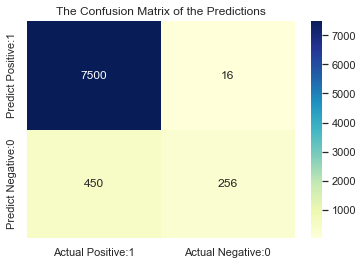

In [239]:
#Make predictions on the test dataset
print('The Test Accuracy is : {:.6f}'.format(accuracy_score(y_test, cat.predict(X_test))))
predcat = cat.predict(X_test)
print("----------------------------------------------")
print(f"The f1_score: ", f1_score(y_test, cat.predict(X_test), average=None))

print("----------------------------------------------")

#The Confusion Matrix of the Predictions
cm = confusion_matrix(y_test, cat.predict(X_test), labels=[0, 1])
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("The Confusion Matrix of the Predictions")
plt.savefig("second_confusion.png")
plt.show()